In [53]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [54]:
import math
import numpy as np
import pylab as plt
from scipy.special import gamma
import scipy.integrate as spint
import xraylib

In [55]:
def func1(E):
    """
    This function calculate an intrinsic part of the spectrum.
    
    :param l: wavelength
    :type l: int, float
    :returns: an array of intensity values
    :rtype: float
    """
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    v=40.0 # напряжение на в трубке
    Ek=v #критическая(максимальная) энергия
    res = b*z*v*v/12.39/12.39*E*E*(Ek/12.39-1/12.39*E)
    return res

In [56]:
def func2(E):
    """
    This function calculate an intrinsic part of the spectrum.
    
    :param l: wavelength
    :type l: int, float
    :returns: an array of intensity values
    :rtype: float
    """
    b=1.0 # константа, узнается из эксперимента
    z=29.0 # порядковый номер элемента анода(медь)
    v=40.0 # напряжение на в трубке
    Ek=v #критическая(максимальная) энергия
    res = b*z*v*v/12.39/12.39*E*E*E*(Ek/12.39-1/12.39*E)
    return res

In [57]:
v = 40 # напряжение на в трубке
Ek=v #критическая(максимальная) энергия
E=np.arange(0, Ek, 0.1) # массив длинн волн

In [58]:
def absorb(intensity, E, material, s): #поглощение
    """
    This function calculate the intensity of the radiation given absorption 0.5mm cuprum.
    
    :param l: wavelength
    :param intensity: intensity without absorption
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    :rtype: float
    """
    r = 5.32873
    c = 3.0
    h = 6.62
    e = E
    A=[]
    for ae in e:
        A.append(exp(-xraylib.CS_Total_CP(material, ae)*r*s))
    return intensity*A

In [59]:
def absorb2(E): #поглощение
    """
    This function calculate the intensity of the radiation given absorption 0.5mm cuprum.
    
    :param l: wavelength
    :param intensity: intensity without absorption
    :param material: absorbing layer
    :param s: the thickness of the absorbing layer
    :returns: intensity with absorption
    :rtype: float
    """
    r = 5.32873
    c = 3.0
    h = 6.62
    e = E
    material = 'H2O'
    s = 0.01
    res2 = func1(E)*exp(-xraylib.CS_Total_CP(material, E)*r*s)
    return res2

In [60]:
intensity = func1(E) # полный спектр

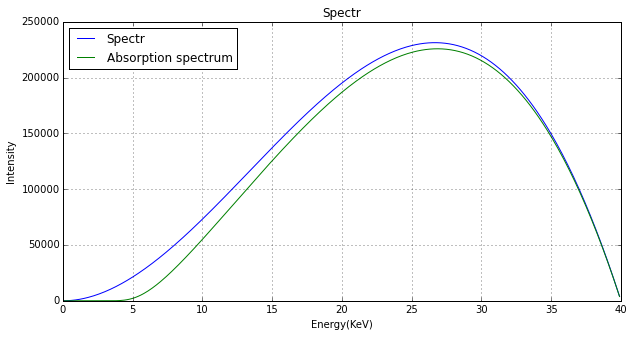

In [61]:
plt.figure(figsize=(10,5))
plt.plot(E,intensity, label='Spectr')
plt.plot(E,absorb(intensity, E, 'H2O', 0.01), label='Absorption spectrum')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectr')
plt.xlabel('Energy(KeV)')
plt.ylabel('Intensity')

In [62]:
# рассчет контрастности полихроматического пучка
Ekr = np.arange(10, 40, 1)
free, _ = spint.quad(func,0,Ek) # интенсивность без поглащения
absorbs, _ = spint.quad(absorb2,0,Ek) # интенсивность c поглащением
print (free-absorbs)/free

0.0666762111856


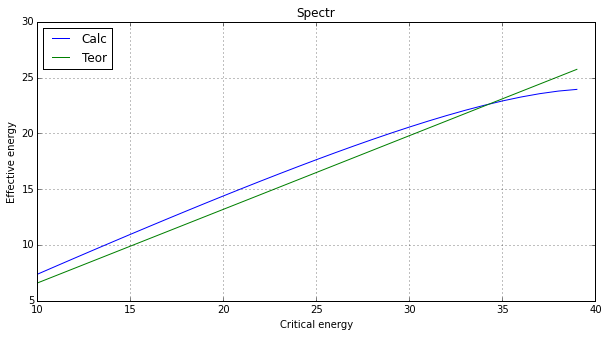

In [63]:
# график зависимомти <E>(Ekr)
Eeff = []
Et = []
for ae in Ekr:
    temp1, _ = spint.quad(func2,0,ae)
    temp2, _ = spint.quad(func1,0,ae)
    Eeff.append(temp1/temp2) # усредненная энергия
    Et.append(0.66*ae) 
plt.figure(figsize=(10,5))
plt.plot(Ekr,Eeff, label='Calc')
plt.plot(Ekr, Et, label='Teor')
plt.grid(True)
plt.legend(loc=0)
plt.title('Spectr')
plt.xlabel('Critical energy')
plt.ylabel('Effective energy')

In [49]:
ae = 0
while ae < 30:
    print (ae, Eeff[ae], Ekr[ae], Eeff[ae]/Ekr[ae])
    ae = ae + 1

(0, 7.384615384615386, 10, 0.7384615384615386)
(1, 8.107086614173229, 11, 0.7370078740157481)
(2, 8.825806451612905, 12, 0.7354838709677421)
(3, 9.540495867768596, 13, 0.7338842975206613)
(4, 10.250847457627117, 14, 0.7322033898305084)
(5, 10.956521739130434, 15, 0.7304347826086955)
(6, 11.657142857142858, 16, 0.7285714285714286)
(7, 12.352293577981653, 17, 0.7266055045871561)
(8, 13.041509433962261, 18, 0.7245283018867923)
(9, 13.724271844660192, 19, 0.7223300970873785)
(10, 14.400000000000002, 20, 0.7200000000000001)
(11, 15.068041237113402, 21, 0.7175257731958763)
(12, 15.727659574468083, 22, 0.7148936170212765)
(13, 16.378021978021977, 23, 0.712087912087912)
(14, 17.01818181818182, 24, 0.7090909090909091)
(15, 17.647058823529413, 25, 0.7058823529411765)
(16, 18.26341463414634, 26, 0.7024390243902439)
(17, 18.86582278481013, 27, 0.69873417721519)
(18, 19.45263157894737, 28, 0.6947368421052632)
(19, 20.021917808219182, 29, 0.6904109589041098)
(20, 20.57142857142857, 30, 0.68571428571